In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from torchvision import datasets
import torch

import cv2

from torch.utils.data import DataLoader

import sys; sys.path.insert(0, "../../")
from src.data.color_mnist import ColorMNIST, color_dict, color_dict_str

## 1) generate color mnist dataset

In [2]:
# TODO: fix random seed here!!
mnist = datasets.MNIST('~/datasets/mnist', train=True, download=True)
mnist_train = (mnist.data, mnist.targets)

In [3]:
mnist_test = datasets.MNIST('~/datasets/mnist', train=False, download=True)
mnist_test = (mnist_test.data, mnist_test.targets)

In [4]:
np.random.seed(0)

COLOR_DICT = {"train": {}, "test": {}}
for dataset, save_folder in zip([mnist_train, mnist_test], ['train', 'test']):
# for dataset, save_folder in zip([mnist_test], ['test']):
    images, labels = dataset
    
    for i in range(len(images)):
        image_original = images[i].cpu().numpy()

        if save_folder == 'test' and i < 5000: # randomly sample color for part of the test set
            color_id = np.random.randint(0, 10)
        else:  
            color_id = int(labels[i])
        
        color = color_dict[color_id]
        COLOR_DICT[save_folder][i] = color_dict_str[color_id]

        image_gray = cv2.cvtColor(image_original, cv2.COLOR_GRAY2RGB)
        image_color = image_gray.copy()

        intensity_mask = image_original / 255

        # vectorized version of the for loop below. for whatever reason, it is not producing the same results...
        # image_color_1 = intensity_mask[..., None] * np.array(color)[None, None, :]

        for x in range(28):
            for y in range(28):
                image_color[x, y] = [p * intensity_mask[x, y] for p in color]

        # plt.savefig(f"/home/metod/datasets/color_mnist/{save_folder}/{i}.jpg")

        np.save(f"/home/metod/datasets/color_mnist/{save_folder}/{i}.npy", image_color)


        # plt.imshow(image_gray)
        # plt.show()
        # plt.imshow(image_color)
        # plt.show()
        # plt.imshow(image_color_1)
        # plt.show()

In [5]:
for dataset, save_folder in zip([mnist_train, mnist_test], ['train', 'test']):
# for dataset, save_folder in zip([mnist_test], ['test']):
    _, labels = dataset
    labels_csv = pd.DataFrame(labels, columns=["digit_label"])
    labels_csv.reset_index(inplace=True)
    labels_csv["color_label"] = labels_csv["index"].apply(lambda x: COLOR_DICT[save_folder][x])
    labels_csv["color_label_random"] = labels_csv["index"].apply(lambda x: x < 5000 and save_folder == "test")
    labels_csv["index"] = labels_csv["index"].apply(lambda x: f"{x}.npy")
    labels_csv = labels_csv[["index", "digit_label", "color_label", "color_label_random"]]
    print(labels_csv)
    labels_csv.to_csv(f"/home/metod/datasets/color_mnist/{save_folder}/labels.csv", index=False, header=False)

           index  digit_label color_label  color_label_random
0          0.npy            5      VIOLET               False
1          1.npy            0    MOCCASIN               False
2          2.npy            4        PINK               False
3          3.npy            1       BROWN               False
4          4.npy            9        BLUE               False
...          ...          ...         ...                 ...
59995  59995.npy            8       GREEN               False
59996  59996.npy            3       WHITE               False
59997  59997.npy            5      VIOLET               False
59998  59998.npy            6      YELLOW               False
59999  59999.npy            8       GREEN               False

[60000 rows x 4 columns]
         index  digit_label color_label  color_label_random
0        0.npy            7      VIOLET                True
1        1.npy            2    MOCCASIN                True
2        2.npy            1       WHITE           

## 2) visualize color mnist

In [2]:
train_dataset = ColorMNIST(train=True)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [9]:
train_labels = [i for _, i in train_dataset]

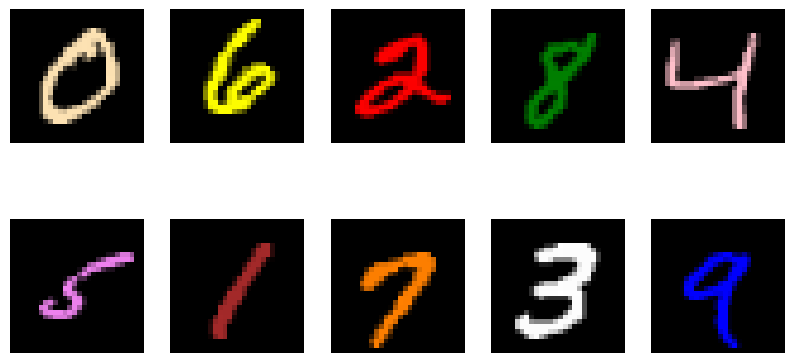

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5))

cols, rows = 3, 3
for i in range(10):
    sample_idx = train_labels.index(i)
    img, label = train_dataset[sample_idx]
    # plt.title(labels_map[label])
    ax[i % 2][i % 5].axis("off")
    ax[i % 2][i % 5].imshow(img.squeeze())
plt.show()

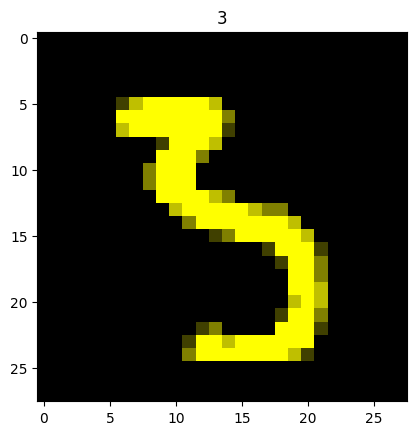

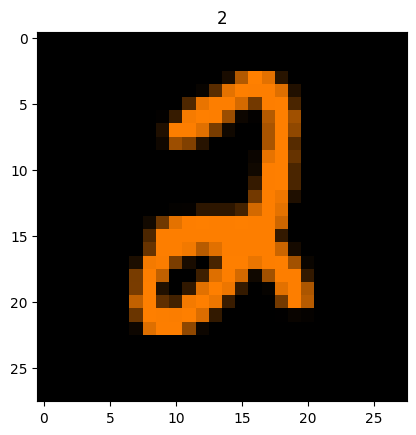

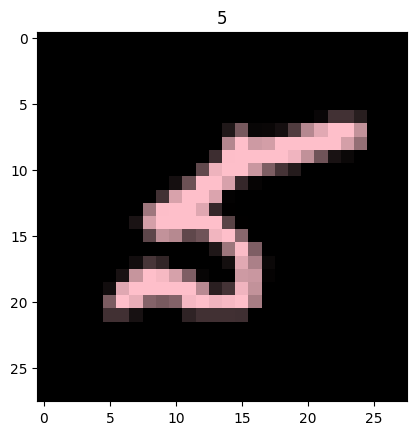

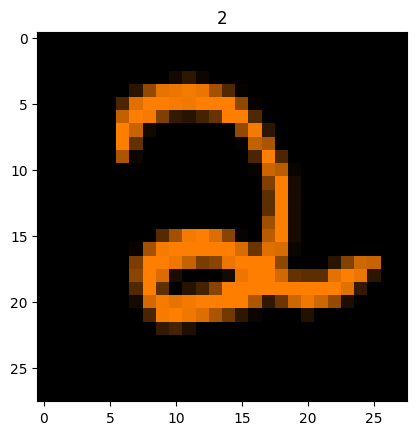

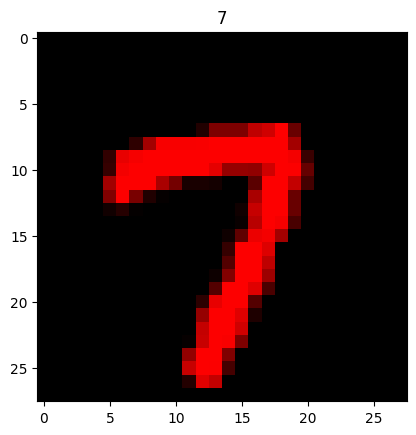

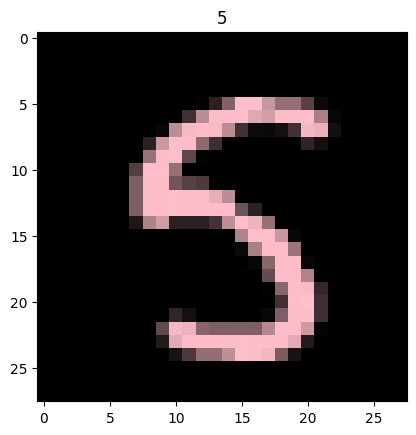

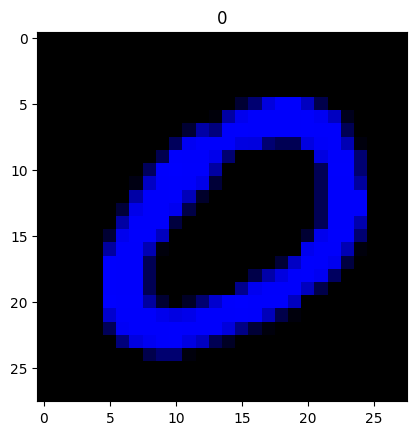

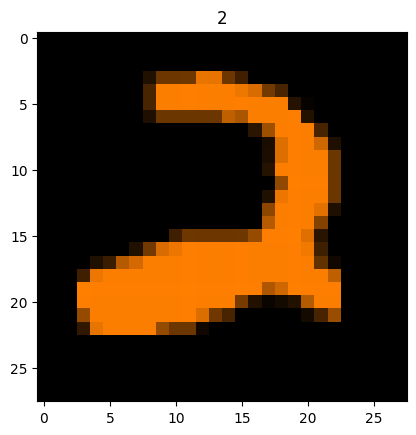

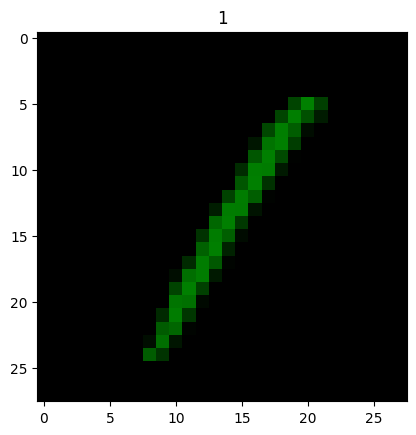

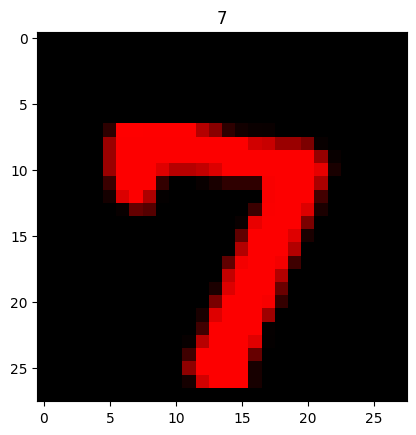

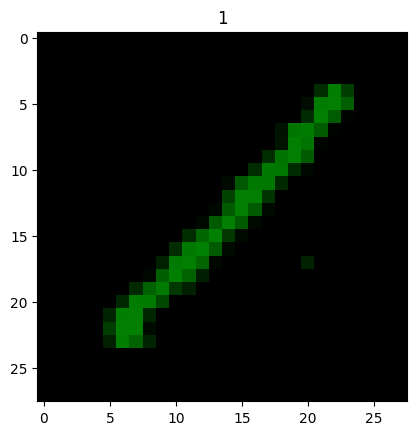

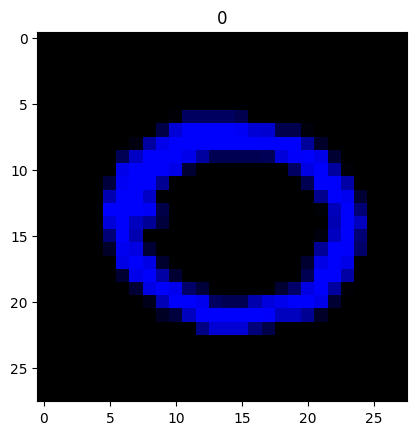

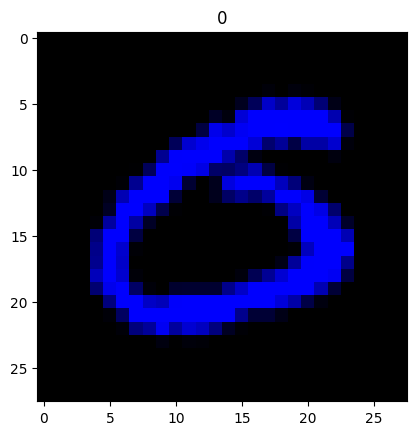

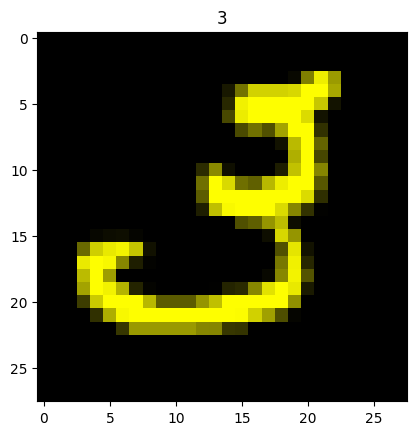

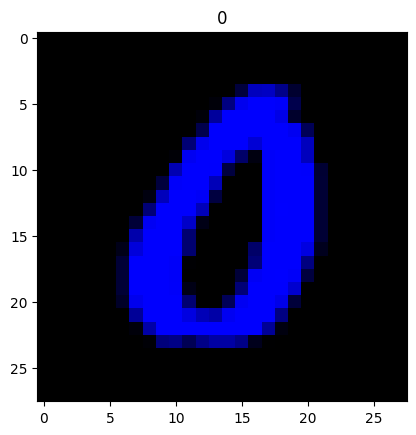

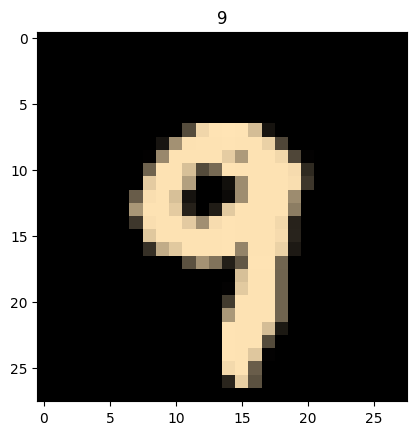

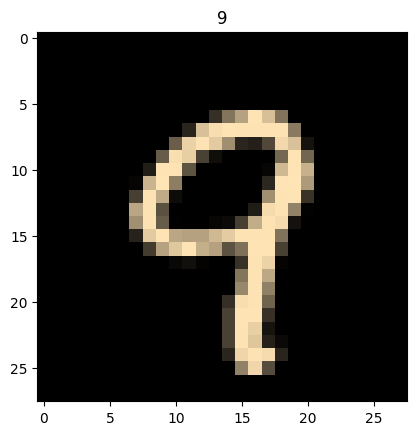

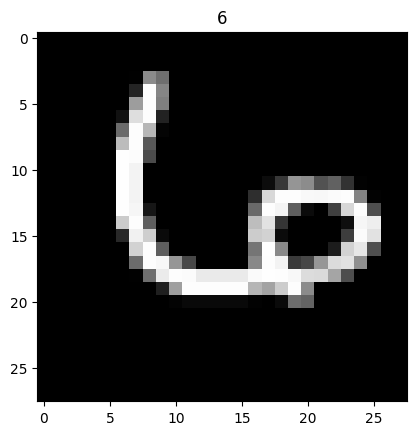

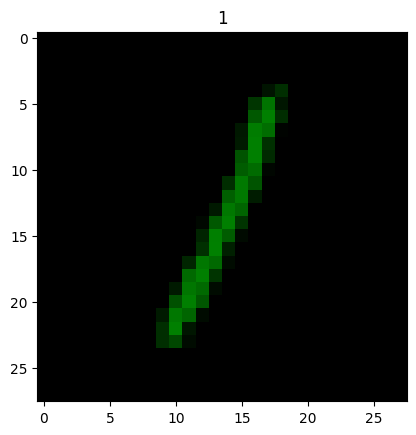

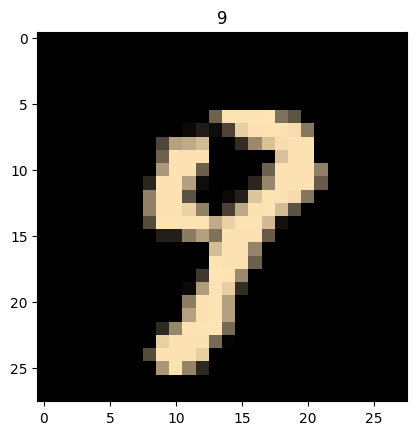

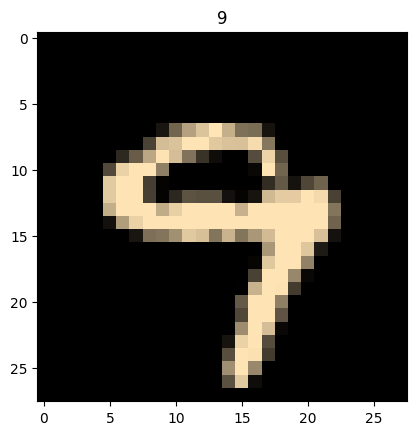

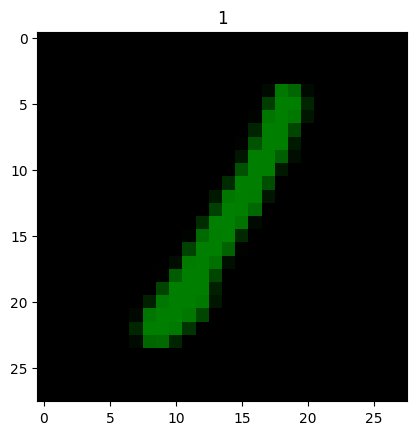

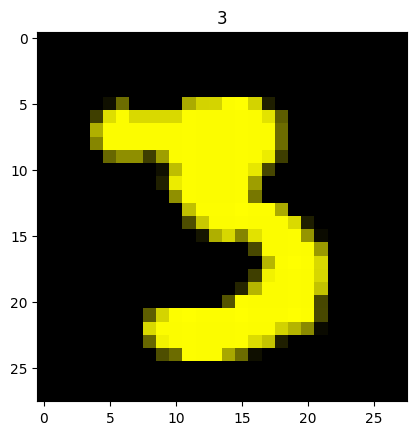

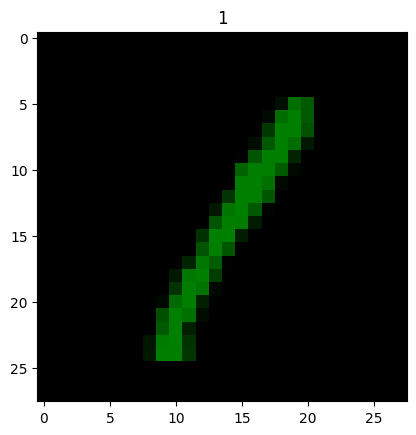

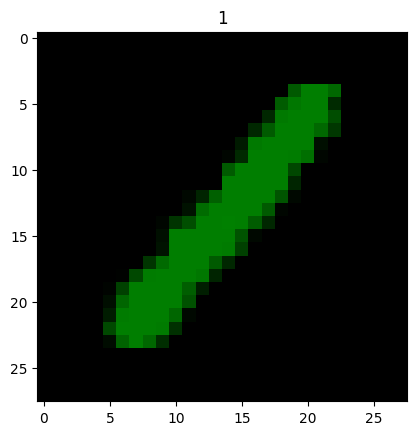

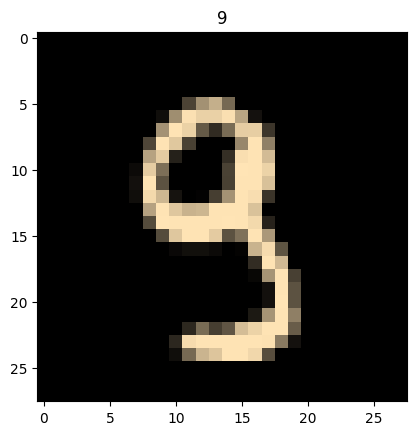

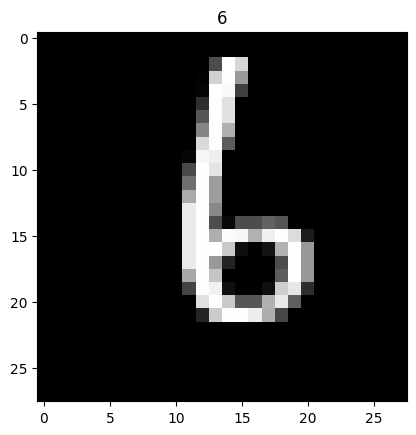

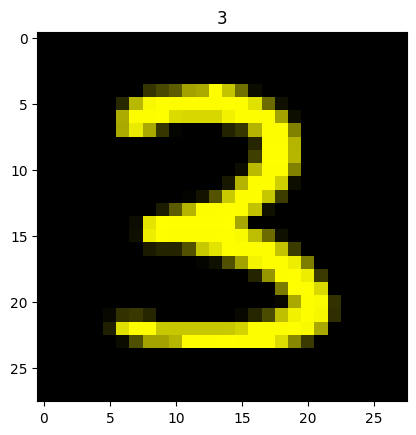

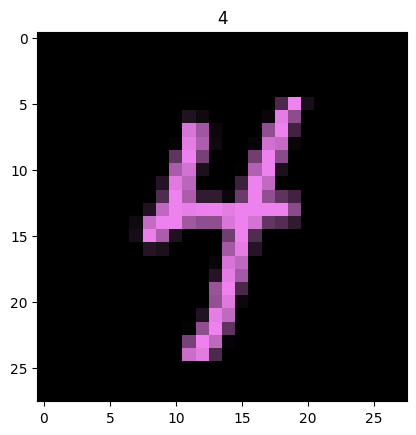

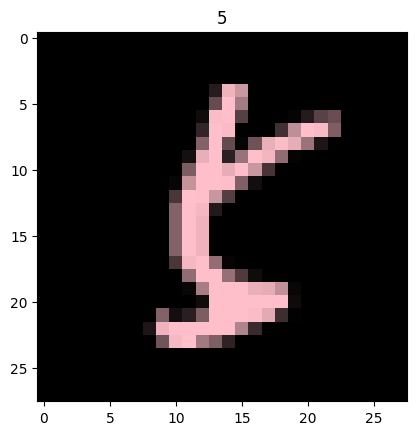

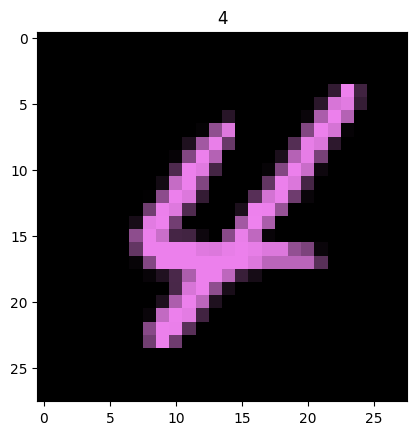

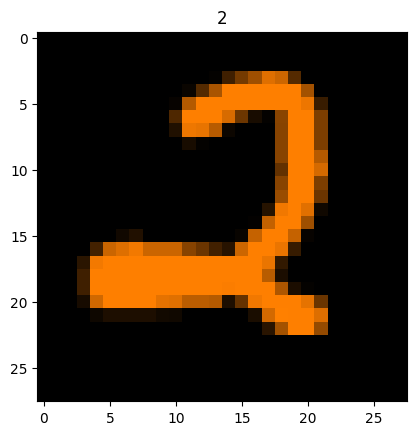

In [5]:
for x, y in train_dataloader:
    for b in range(x.shape[0]):
        plt.imshow(x[b])
        plt.title(int(y[b]))
        plt.show()
    break

## 3) color mnist dataset statistics

In [36]:
np.stack([x for x, _ in train_dataset], axis=0).mean(axis=(0, 1 ,2))

array([0.09911159, 0.0678002 , 0.06203563])

In [37]:
np.stack([x for x, _ in train_dataset], axis=0).std(axis=(0, 1 ,2))

array([0.26728989, 0.20322606, 0.2080604 ])

## 4) visualize color mnist experiment results

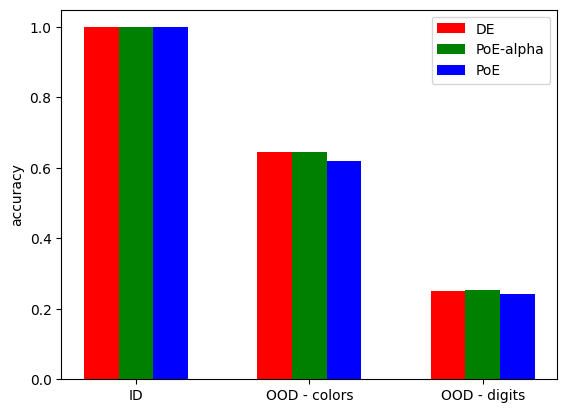

In [19]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [0.999, 0.6455291, 0.24964994]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [0.999, 0.64372873, 0.25225043]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [0.999, 0.620062, 0.24104822]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('accuracy')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('ID', 'OOD - colors', 'OOD - digits') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('DE', 'PoE-alpha', 'PoE') )


plt.show()